In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, curvedsky, tools_lens, tools_delens, tools_multitracer, binning
from matplotlib.pyplot import *

In [9]:
snmin, snmax = 1, 100
olmax = 1024
ntypes = ['base','base_iso','base_la','goal','goal_iso','goal_la']
labels = ['Baseline','','','Goal','','']
colors = ['m','m','m','b','b','b']
lines  = ['-','--','-.','-','--','-.']
fig_kwargs = {'xlabsize':18,'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':16}

In [3]:
d = prjlib.data_directory()
dobj = {}
for ntype in ntypes:
    Ntype = ntype.replace('_la','')+'_roll50'
    p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=Ntype)
    if '_la' in ntype:
        pE = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype=Ntype)
    else:
        pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=Ntype.replace('_iso',''))
    qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(p,qobj)
    dobj[ntype,'all'] = tools_delens.init_template(p.stag+qobj.ltag,mobj,pE,False,elmin=50)

In [4]:
r = {}
for ntype in ntypes:
    r[ntype] = 0
    for i in range(snmin,snmax+1):
        BB, TT, BT = np.loadtxt(dobj[ntype,'all'].cl['comb'][i],unpack=True)
        r[ntype] += BT**2/BB/TT/(snmax-snmin+1)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [5]:
rb = {}
mb = binning.multipole_binning(20,lmin=5,lmax=200)
for ntype in ntypes:
    rb[ntype] = binning.binning(r[ntype],mb)

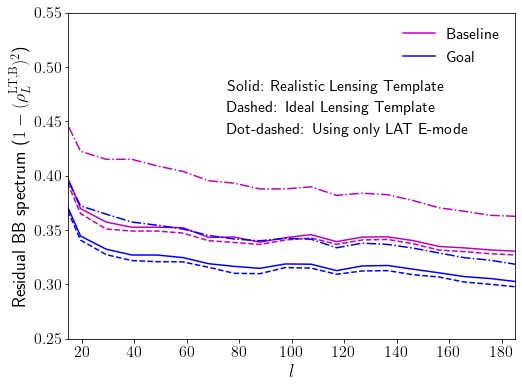

In [10]:
pl.plot_1dstyle(usetex=True,fsize=[8,6],xmin=15,xmax=185,ymin=.25,ymax=.55,xlab=r'$l$',ylab=r'Residual BB spectrum ($1-(\rho_L^{\rm LT,B})^2$)',**fig_kwargs)
for ntype, label, color, ls in zip(ntypes,labels,colors,lines):
    plot(mb.bc,1-rb[ntype],label=label,color=color,ls=ls)
legend(loc=0)
figtext(0.4,0.7,'Solid: Realistic Lensing Template',fontsize=16)
figtext(0.4,0.65,'Dashed: Ideal Lensing Template',fontsize=16)
figtext(0.4,0.6,'Dot-dashed: Using only LAT E-mode',fontsize=16)
savefig('fig_BB_correlation.pdf')